In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np
import pylab as plt

import localpaths
import subimage
import gtsrb

In [2]:
si_train = gtsrb.parse_train('~/Data/GTSRB/Final_Training/Images')
si_test = gtsrb.parse_test('~/Data/GTSRB/Final_Test/Images/GT-final_test.test.csv')

print(str(si_train))
print(str(si_test))

39209 images with 43 unique classes
12630 images with 1 unique classes


there are 1307 tracks and 39209 images in training set
there are 12630 images in test set


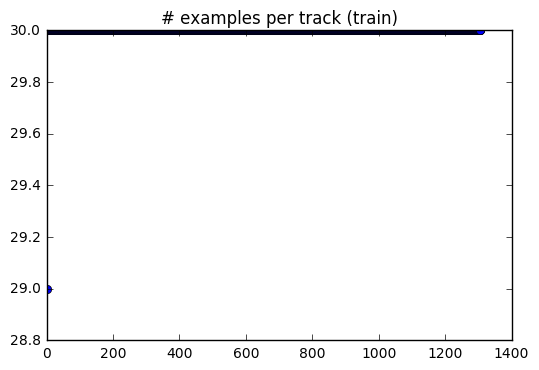

In [ ]:
#
# Make sure we see the expected number of examples.
#
trk_to_class, trk_to_cnt = si_train.group_info()
print('there are %d tracks and %d images in training set' % (len(trk_to_class), len(si_train)))
print('there are %d images in test set' % len(si_test))

track_lengths = np.array(list(trk_to_cnt.values()))

plt.figure()
plt.plot(np.sort(track_lengths), 'o-')
plt.title('# examples per track (train)')
plt.show()


In [ ]:
train_idx, test_idx = gtsrb.default_train_test_split(si_train)

y_all = np.array(si_train._y, dtype=np.int32)

#
# overall distribution of examples in train/test
#
plt.figure()
plt.hist(y_all[train_idx], np.max(y_all)+1)
plt.grid('on')
plt.title('Class distribution for train set')

plt.figure()
plt.hist(y_all[test_idx], np.max(y_all)+1)
plt.grid('on')
plt.title('Class distribution for validation set')

plt.show()

In [ ]:
# Load the images: this is a little slow...
tic = time.time()
x_train, y_train = si_train.get_subimages(train_idx, verbose=True)
x_test, y_test = si_train.get_subimages(train_idx, verbose=True)
print(time.time() - tic, ' seconds to load test images')

# Note: we don't resize images here, so x_train/x_Test are lists...

In [ ]:
#-------------------------------
# statistics on image size
#-------------------------------
rows_train = [x_train[ii].shape[0] for ii in range(len(x_train))]
cols_train = [x_train[ii].shape[1] for ii in range(len(x_train))]
rows_test = [x_test[ii].shape[0] for ii in range(len(x_test))]
cols_test = [x_test[ii].shape[1] for ii in range(len(x_test))]

print('median # rows, train:', np.median(rows_train))
print('median # rows, test: ', np.median(rows_test))
print('median # cols, train:', np.median(cols_train))
print('median # cols, test: ', np.median(cols_test))

_, bin_edges = np.histogram(rows_train, bins=30)

plt.figure()
plt.hist(rows_train, bins=bin_edges, alpha=0.5, label='train', normed=True)
plt.hist(rows_test, bins=bin_edges, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image heights')

_, bin_edges = np.histogram(cols_train, bins=30)

plt.figure()
plt.hist(cols_train, bins=bin_edges, alpha=0.5, label='train', normed=True)
plt.hist(cols_test, bins=bin_edges, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image widths')


plt.show()

In [ ]:
#-------------------------------
# Statistics on pixel intensity values
#-------------------------------
tmp = [x.ravel() for x in x_train]
x_train_flat = np.concatenate(tmp)
print(x_train_flat.shape)

tmp = [x.ravel() for x in x_test]
x_test_flat = np.concatenate(tmp)
print(x_test_flat.shape)

_, bin_edges = np.histogram(x_train_flat, bins=20)

plt.figure()
plt.hist(x_train_flat, bins=bin_edges, alpha=0.5, label='train', normed=True)
plt.hist(x_test_flat, bins=bin_edges, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('pixel intensities')


#-------------------------------
# Pixel intensities (per image)
#-------------------------------
median_intensity_train = [np.median(x_train[ii]) for ii in range(len(x_train))]
median_intensity_train = np.array(median_intensity_train)
idx = np.argsort(median_intensity_train)

plt.figure()
plt.plot(median_intensity_train[idx])
plt.ylabel('median pixel intensity')
plt.xlabel('training example')
plt.title('median pixel intensity for training data')
plt.grid('on')

for img_idx in [idx[0], idx[-1]]:
    xi = np.squeeze(x_train[img_idx])
    xi_centered = (xi - np.mean(xi)) / np.std(xi)
    
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(xi, interpolation=None, cmap='gray')
    plt.title('%0.2f/%0.2f/%0.2f' % (np.min(xi), np.median(xi), np.max(xi)))
    
    plt.subplot(1,2,2)
    plt.imshow(xi_centered, interpolation=None, cmap='gray')
    plt.title('median pixel intensity: %0.2f' % np.median(xi_centered))
plt.show()
